10. Applying SVM, Naive Bayes, Decision tree and KNN predict diabetes based on features set. Compare the four classification algorithms with performance metrics such as accuracy, recall, precision, F1- score. Also design the heat map confusion matrix for above algorithms and construct ROC curve for comparison.
Dataset: pima-indians-diabetes.data.csv



 Performance Metrics:
               Accuracy  Recall  Precision  F1 Score     AUC
Model                                                       
SVM              0.7338  0.5636     0.6458    0.6019  0.8048
Naive Bayes      0.7662  0.7091     0.6610    0.6842  0.8253
Decision Tree    0.7532  0.7091     0.6393    0.6724  0.7434
KNN              0.6948  0.5091     0.5833    0.5437  0.7641


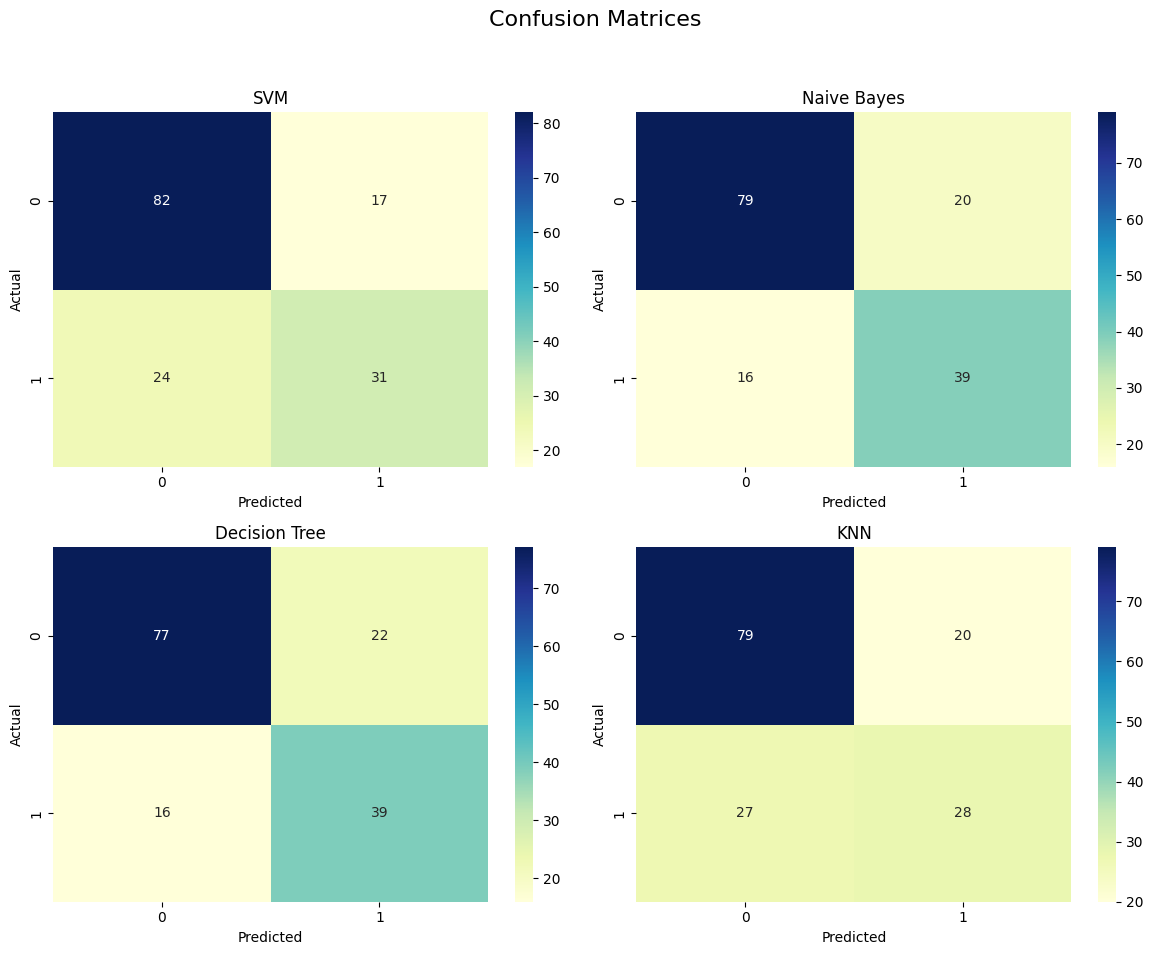

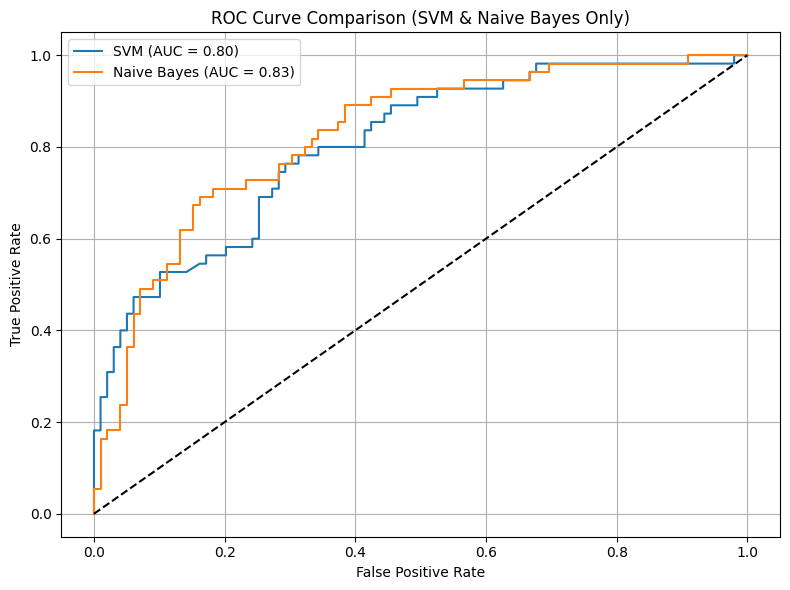

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_curve, auc
    )
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models to evaluate
models = {
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Conf Matrix": confusion_matrix(y_test, y_pred),
        "ROC": roc_curve(y_test, y_prob),
        "AUC": auc(*roc_curve(y_test, y_prob)[:2])
    })

# Display performance table
summary = pd.DataFrame([{k: v for k, v in r.items() if k not in ['Conf Matrix', 'ROC']} for r in results])
summary.set_index('Model', inplace=True)
print("\n Performance Metrics:")
print(summary.round(4))

# Plot Confusion Matrices
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()
for i, r in enumerate(results):
    sns.heatmap(r['Conf Matrix'], annot=True, fmt='d', cmap='YlGnBu', ax=axs[i])
    axs[i].set_title(f"{r['Model']}")
    axs[i].set_xlabel("Predicted")
    axs[i].set_ylabel("Actual")
plt.suptitle("Confusion Matrices", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot ROC Curves (Only for SVM and Naive Bayes)
plt.figure(figsize=(8,6))
for r in results:
    if r['Model'] in ['SVM', 'Naive Bayes']:
        fpr, tpr, _ = r['ROC']
        plt.plot(fpr, tpr, label=f"{r['Model']} (AUC = {r['AUC']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison (SVM & Naive Bayes Only)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Here is the modified code that incorporates **SelectKBest** for feature selection:



Selected Features: [0, 1, 5, 6, 7]

 Performance Metrics:
               Accuracy  Recall  Precision  F1 Score     AUC
Model                                                       
SVM              0.7662  0.6545     0.6792    0.6667  0.8301
Naive Bayes      0.7532  0.6727     0.6491    0.6607  0.8220
Decision Tree    0.7143  0.6909     0.5846    0.6333  0.7091
KNN              0.7338  0.6727     0.6167    0.6435  0.7877


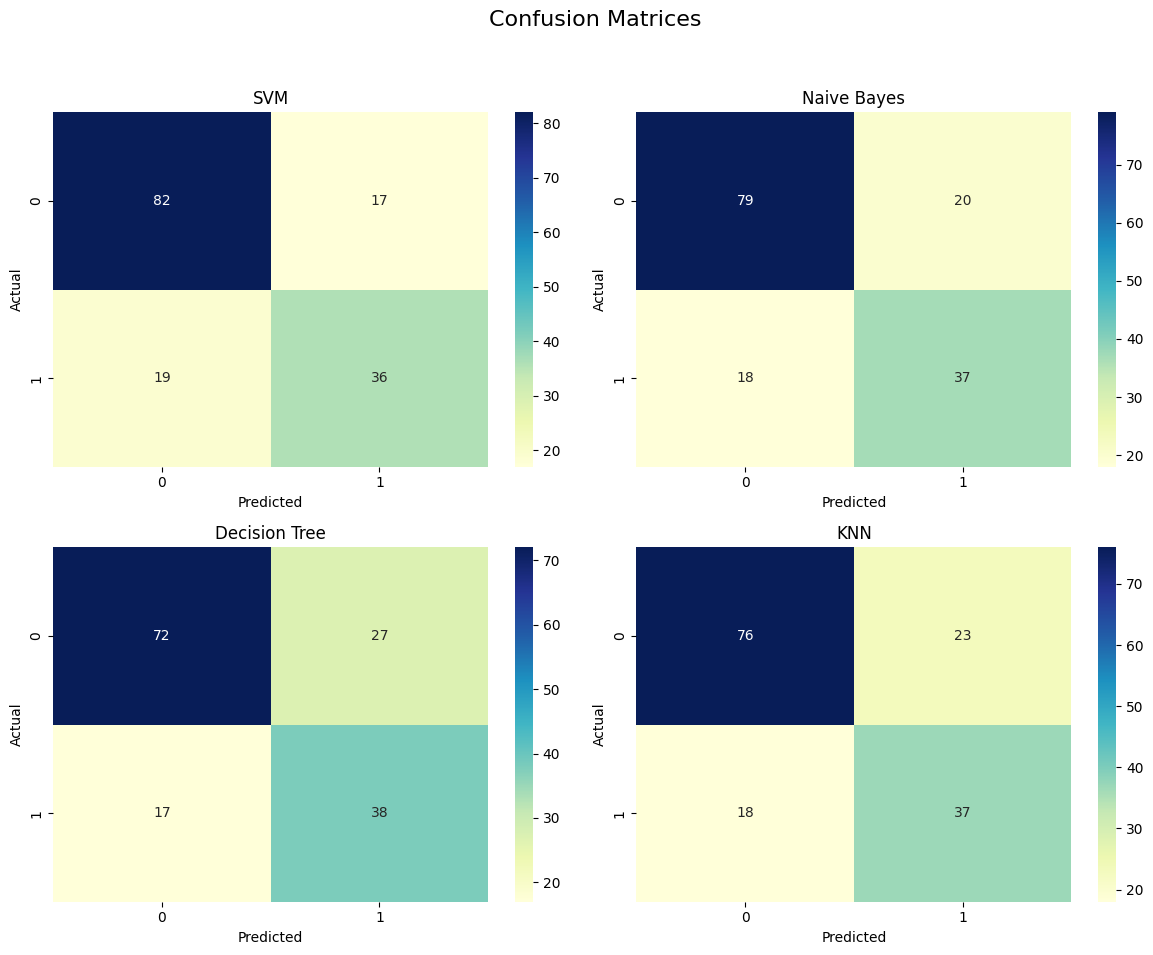

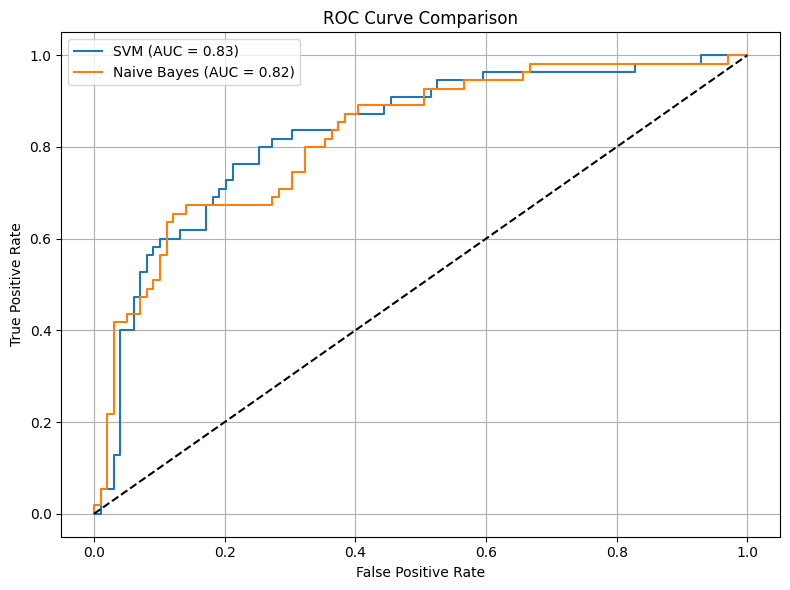

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
df = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection using SelectKBest
selector = SelectKBest(f_classif, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Get selected feature indices
selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {list(selected_features)}")

# Models to evaluate
models = {
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

results = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Conf Matrix": confusion_matrix(y_test, y_pred),
        "ROC": roc_curve(y_test, y_prob),
        "AUC": auc(*roc_curve(y_test, y_prob)[:2])
    })

# Display performance table
summary = pd.DataFrame([{k: v for k, v in r.items() if k not in ['Conf Matrix', 'ROC']} for r in results])
summary.set_index('Model', inplace=True)
print("\n Performance Metrics:")
print(summary.round(4))

# Plot Confusion Matrices
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()
for i, r in enumerate(results):
    sns.heatmap(r['Conf Matrix'], annot=True, fmt='d', cmap='YlGnBu', ax=axs[i])
    axs[i].set_title(f"{r['Model']}")
    axs[i].set_xlabel("Predicted")
    axs[i].set_ylabel("Actual")
plt.suptitle("Confusion Matrices", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Plot ROC Curves
plt.figure(figsize=(8, 6))
for r in results:
    if r['Model'] in ['SVM', 'Naive Bayes']:
        fpr, tpr, _ = r['ROC']
        plt.plot(fpr, tpr, label=f"{r['Model']} (AUC = {r['AUC']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The provided code implements a machine learning pipeline to predict diabetes using four classification algorithms: **SVM**, **Naive Bayes**, **Decision Tree**, and **KNN**. It evaluates the models using performance metrics such as accuracy, recall, precision, F1-score, and AUC. Additionally, it visualizes the results using confusion matrices and ROC curves. Below is a detailed explanation of the code:

---

### **1. Problem Statement**
The goal is to predict whether a person has diabetes based on a set of features. The dataset used is the **Pima Indians Diabetes Dataset** (`pima-indians-diabetes.data.csv`). The following steps are performed:
1. Train four classification algorithms:
   - Support Vector Machine (SVM)
   - Naive Bayes
   - Decision Tree
   - K-Nearest Neighbors (KNN)
2. Evaluate the models using:
   - Accuracy
   - Recall
   - Precision
   - F1-Score
   - AUC (Area Under the Curve)
3. Visualize the results using:
   - Heatmap confusion matrices
   - ROC curves

---

### **2. Importing Libraries**


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score,
    confusion_matrix, roc_curve, auc
)
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

- **`pandas`**: For data manipulation and analysis.
- **`numpy`**: For numerical operations.
- **`matplotlib` and `seaborn`**: For data visualization.
- **`sklearn`**: For preprocessing, feature selection, model training, and evaluation metrics.

---

### **3. Loading and Preprocessing the Dataset**


In [17]:
df = pd.read_csv('pima-indians-diabetes.data.csv', header=None)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

- **Dataset**: The dataset is loaded from a CSV file without headers.
- **Features (`X`)**: All columns except the last one are used as features.
- **Target (`y`)**: The last column is used as the target variable, where `1` indicates diabetes and `0` indicates no diabetes.

---

### **4. Train-Test Split**


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

- **Train-Test Split**: The dataset is split into training (80%) and testing (20%) sets.
- **Random State**: Ensures reproducibility of the split.

---

### **5. Scaling Features**


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

- **StandardScaler**: Standardizes the features by removing the mean and scaling to unit variance. This ensures that all features are on the same scale, which is important for algorithms like SVM and KNN.

---

### **6. Feature Selection using SelectKBest**


In [20]:
selector = SelectKBest(f_classif, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X.columns[selector.get_support()]
print(f"Selected Features: {list(selected_features)}")

Selected Features: [0, 1, 5, 6, 7]


- **`SelectKBest`**: Selects the top `k` features based on their statistical significance with the target variable (`y`).
- **`f_classif`**: ANOVA F-test is used to compute the scores for each feature.
- **Selected Features**: The names of the top 5 selected features are printed.

---

### **7. Defining Models**


In [21]:
models = {
    "SVM": SVC(probability=True),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier()
}

- Four classification models are defined:
  - **SVM**: Support Vector Machine with probability estimation enabled.
  - **Naive Bayes**: Gaussian Naive Bayes classifier.
  - **Decision Tree**: Decision Tree classifier.
  - **KNN**: K-Nearest Neighbors classifier.

---

### **8. Training and Evaluating Models**


In [22]:
results = []

for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    y_prob = model.predict_proba(X_test_selected)[:, 1]

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Conf Matrix": confusion_matrix(y_test, y_pred),
        "ROC": roc_curve(y_test, y_prob),
        "AUC": auc(*roc_curve(y_test, y_prob)[:2])
    })

- **Training**: Each model is trained on the selected features of the training data.
- **Predictions**:
  - `y_pred`: Predicted class labels.
  - `y_prob`: Predicted probabilities for the positive class (diabetes).
- **Metrics**:
  - **Accuracy**: Proportion of correct predictions.
  - **Recall**: Proportion of actual positives correctly identified.
  - **Precision**: Proportion of predicted positives that are correct.
  - **F1-Score**: Harmonic mean of precision and recall.
  - **Confusion Matrix**: Counts of true positives, true negatives, false positives, and false negatives.
  - **ROC Curve**: False Positive Rate (FPR) and True Positive Rate (TPR) are calculated for plotting the ROC curve.
  - **AUC**: Area Under the Curve, a measure of the model's ability to distinguish between classes.

---

### **9. Displaying Performance Metrics**


In [23]:
summary = pd.DataFrame([{k: v for k, v in r.items() if k not in ['Conf Matrix', 'ROC']} for r in results])
summary.set_index('Model', inplace=True)
print("\n Performance Metrics:")
print(summary.round(4))


 Performance Metrics:
               Accuracy  Recall  Precision  F1 Score     AUC
Model                                                       
SVM              0.7662  0.6545     0.6792    0.6667  0.8301
Naive Bayes      0.7532  0.6727     0.6491    0.6607  0.8220
Decision Tree    0.7208  0.6727     0.5968    0.6325  0.7101
KNN              0.7338  0.6727     0.6167    0.6435  0.7877


- **Metrics Table**: The computed metrics for each model are displayed in a tabular format.

---

### **10. Plotting Confusion Matrices**


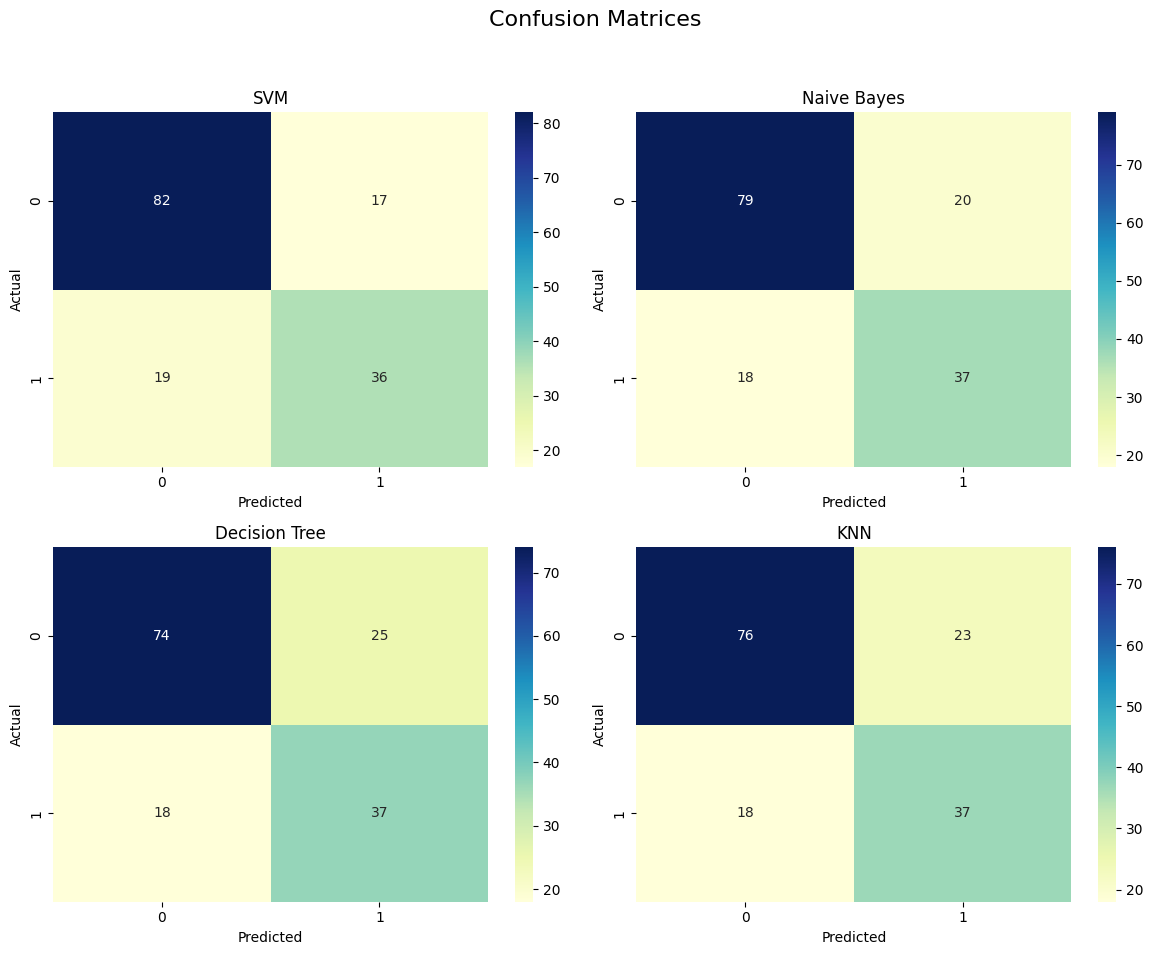

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()
for i, r in enumerate(results):
    sns.heatmap(r['Conf Matrix'], annot=True, fmt='d', cmap='YlGnBu', ax=axs[i])
    axs[i].set_title(f"{r['Model']}")
    axs[i].set_xlabel("Predicted")
    axs[i].set_ylabel("Actual")
plt.suptitle("Confusion Matrices", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

- **Confusion Matrices**: Visualizes the confusion matrix for each model as a heatmap.

---

### **11. Plotting ROC Curves**


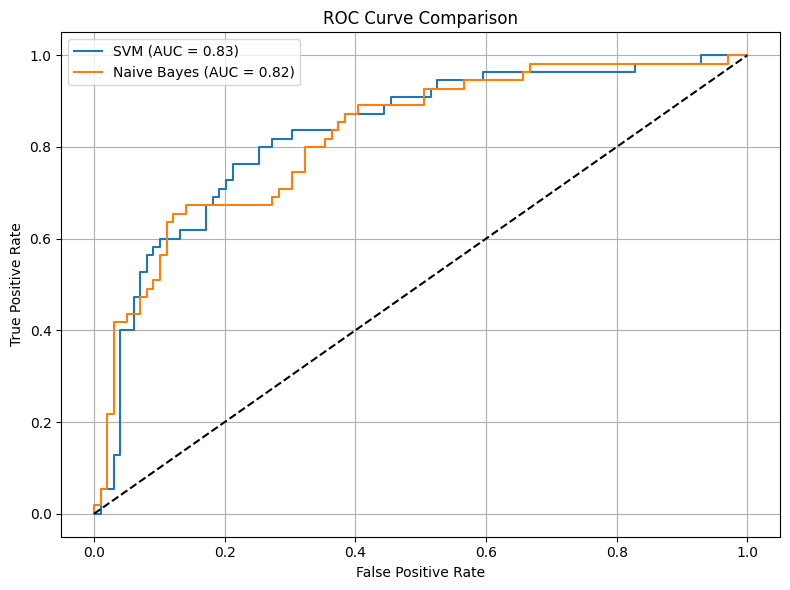

In [25]:
plt.figure(figsize=(8, 6))
for r in results:
    if r['Model'] in ['SVM', 'Naive Bayes']:
        fpr, tpr, _ = r['ROC']
        plt.plot(fpr, tpr, label=f"{r['Model']} (AUC = {r['AUC']:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- **ROC Curves**: Plots the ROC curve for all models, showing the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR).
- **AUC**: The Area Under the Curve (AUC) is displayed in the legend for each model.

---

### **Key Outputs**
1. **Selected Features**: Displays the top 5 features selected by `SelectKBest`.
2. **Performance Metrics**: Summarizes accuracy, recall, precision, F1-score, and AUC for all models.
3. **Confusion Matrices**: Visualizes the classification results for each model.
4. **ROC Curves**: Compares the models' ability to distinguish between classes.

---

### **Summary**
This code evaluates and compares the performance of four classification algorithms (SVM, Naive Bayes, Decision Tree, and KNN) on the Pima Indians Diabetes dataset. It uses **SelectKBest** for feature selection, computes various performance metrics, and visualizes the results using confusion matrices and ROC curves.



---

### **Key Changes**
1. **Feature Selection**:
   - Added `SelectKBest` with `f_classif` to select the top 5 features based on their statistical significance.
   - Applied the feature selection to both training and testing datasets.

2. **Selected Features**:
   - Printed the names of the selected features for reference.

3. **Model Training**:
   - Models are trained and evaluated using the reduced feature set (`X_train_selected` and `X_test_selected`).

---

### **Output**
- **Selected Features**: Displays the top 5 features selected by `SelectKBest`.
- **Performance Metrics**: Summarizes accuracy, recall, precision, F1-score, and AUC for all models.
- **Confusion Matrices**: Visualizes the confusion matrix for each model.
- **ROC Curves**: Plots the ROC curve for all models, showing their ability to distinguish between classes.